In [24]:
import pandas as pd
from plotnine import *
import os

In [25]:
data_list = []
directory = os.path.join(os.path.dirname("./readings/"), 'round1')

for file in os.listdir(directory):
    if not (file.lower().endswith('.csv')):
        continue
#     print(file)
    df = pd.read_csv(directory + '/' + file)
    data_list.append(df)

In [26]:
all_data = pd.concat(data_list)

In [27]:
df_accs = (
    all_data[all_data.data == 'test']
    [all_data.columns[:4]]
    .dropna(subset=['label', 'data'])
    .groupby(['label', 'data'])
    .agg('mean')
    .assign(loss = lambda x: x['0'])
    .drop(columns=['fold', '0'])
    .reset_index()
)
df_accs

,label,data,loss
0,1-layer,test,13.406569
1,1-layer-0.1,test,14.229938
2,1-layer-0.2,test,11.008466
3,1-layer-0.3,test,10.405272
4,1-layer-0.4,test,14.122850
5,1-layer-0.5,test,10.396493
6,1-layer-shuffled-0,test,5.783189
7,1-layer-shuffled-0.1,test,5.746903
8,1-layer-shuffled-0.2,test,10.940809
9,1-layer-shuffled-0.3,test,8.400015


In [28]:
df_filt = (
    all_data.dropna()
    .drop(columns=['fold'])
    .melt(id_vars=['label', 'data'], var_name='epoch')
    .assign(epoch = lambda x: x.epoch.astype(int))
    .assign(value = lambda x: x.value.astype(float))
    .groupby(['label', 'data', 'epoch'])
    .agg('mean')
    .reset_index()
)
df_filt

,label,data,epoch,value
0,1-layer,train,0,19.339145
1,1-layer,train,1,16.240756
2,1-layer,train,2,13.469281
3,1-layer,train,3,11.421152
4,1-layer,train,4,10.429271
...,...,...,...,...
3595,3-layer-shuffled-0.5,validation,45,7.018699
3596,3-layer-shuffled-0.5,validation,46,6.967476
3597,3-layer-shuffled-0.5,validation,47,7.004362
3598,3-layer-shuffled-0.5,validation,48,7.009439


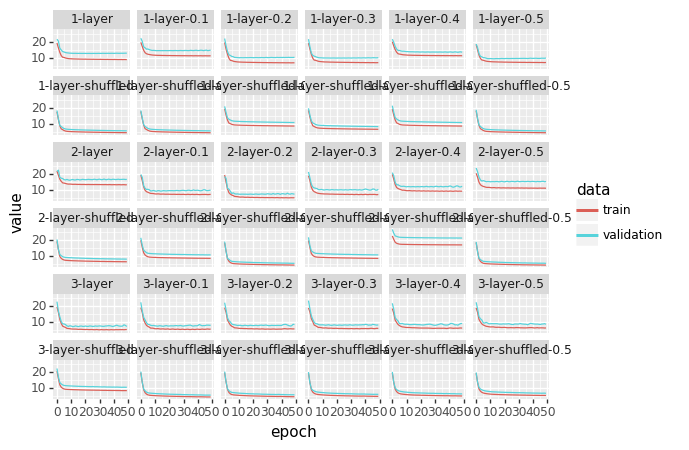

<ggplot: (8735270874109)>

In [30]:
g = (ggplot(df_filt)
 + aes(x='epoch', y='value', color='data')
 + geom_line()
 + facet_wrap(['label'])
)
g

In [23]:
ggsave(g, "./readings/round1/alltrain.png")

/home/rishi/.virtualenvs/dropout/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/rishi/.virtualenvs/dropout/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ./readings/round1/alltrain.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


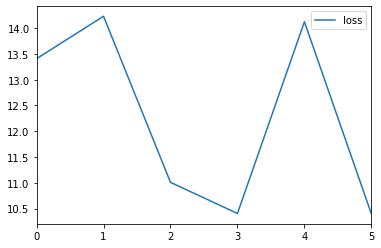

In [126]:
df_accs[df_accs.label.str.contains('1-layer')].drop(columns='data').plot()

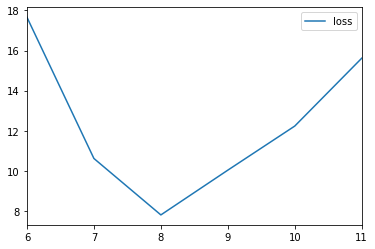

In [127]:
df_accs[df_accs.label.str.contains('2-layer')].drop(columns='data').plot()

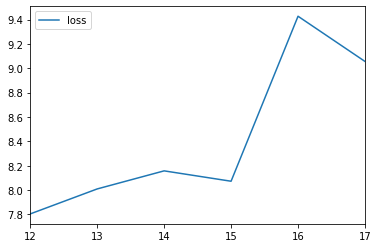

In [128]:
df_accs[df_accs.label.str.contains('3-layer')].drop(columns='data').plot()